# Fertlizer Recomendation model

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

### Acessing the Dataset

In [2]:
fertilizer = pd.read_csv('Datasets/Fertilizer Prediction.csv')

### Checking if dataset is loaded correctly

In [3]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


### Encoding the Categorical Datas.

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

columns_to_encode = ['Soil Type', 'Crop Type']

fertilizer[columns_to_encode] = fertilizer[columns_to_encode].apply(encoder.fit_transform)

In [5]:
fertilizer.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea


In [6]:
X = fertilizer.drop('Fertilizer Name', axis=1)
y = fertilizer['Fertilizer Name']

In [7]:
y.head()

0        Urea
1         DAP
2    14-35-14
3       28-28
4        Urea
Name: Fertilizer Name, dtype: object

In [8]:
fertilizer.describe()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,2.010101,5.151515,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,1.410565,3.140790,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,1.000000,2.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,2.000000,5.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,3.000000,8.000000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,4.000000,10.000000,42.000000,19.000000,42.000000


#### shaping the fertilizer

In [9]:
fertilizer.shape

(99, 9)

#### fertilizers count

In [10]:
fertilizer.count()

Temparature        99
Humidity           99
Moisture           99
Soil Type          99
Crop Type          99
Nitrogen           99
Potassium          99
Phosphorous        99
Fertilizer Name    99
dtype: int64

In [11]:
fertilizer['Fertilizer Name'].values

array(['Urea', 'DAP', '14-35-14', '28-28', 'Urea', '17-17-17', '20-20',
       'Urea', '28-28', '14-35-14', 'DAP', '17-17-17', 'Urea', '28-28',
       'DAP', '17-17-17', 'Urea', '28-28', 'Urea', 'DAP', '20-20',
       '17-17-17', 'DAP', 'Urea', '20-20', '28-28', '14-35-14', 'Urea',
       'DAP', '20-20', '28-28', 'DAP', 'Urea', '14-35-14', '28-28',
       'Urea', '14-35-14', 'DAP', '17-17-17', 'DAP', '20-20', '14-35-14',
       '28-28', 'Urea', 'DAP', '14-35-14', '20-20', '28-28', 'Urea',
       '14-35-14', '28-28', '20-20', 'Urea', 'DAP', '17-17-17', '28-28',
       'Urea', '20-20', '17-17-17', 'DAP', 'Urea', '20-20', '28-28',
       '10-26-26', 'Urea', 'DAP', '20-20', '14-35-14', '10-26-26',
       '20-20', '28-28', 'Urea', '28-28', 'Urea', 'DAP', '14-35-14',
       '28-28', '20-20', '10-26-26', 'DAP', '14-35-14', 'Urea', 'DAP',
       '20-20', '28-28', '14-35-14', '10-26-26', 'Urea', '10-26-26',
       'DAP', '14-35-14', '10-26-26', 'Urea', '14-35-14', '28-28',
       '10-26-26', 'U

In [12]:
data=['Urea', 'DAP', '14-35-14', '28-28', 'Urea', '17-17-17', '20-20',
       'Urea', '28-28', '14-35-14', 'DAP', '17-17-17', 'Urea', '28-28',
       'DAP', '17-17-17', 'Urea', '28-28', 'Urea', 'DAP', '20-20',
       '17-17-17', 'DAP', 'Urea', '20-20', '28-28', '14-35-14', 'Urea',
       'DAP', '20-20', '28-28', 'DAP', 'Urea', '14-35-14', '28-28',
       'Urea', '14-35-14', 'DAP', '17-17-17', 'DAP', '20-20', '14-35-14',
       '28-28', 'Urea', 'DAP', '14-35-14', '20-20', '28-28', 'Urea',
       '14-35-14', '28-28', '20-20', 'Urea', 'DAP', '17-17-17', '28-28',
       'Urea', '20-20', '17-17-17', 'DAP', 'Urea', '20-20', '28-28',
       '10-26-26', 'Urea', 'DAP', '20-20', '14-35-14', '10-26-26',
       '20-20', '28-28', 'Urea', '28-28', 'Urea', 'DAP', '14-35-14',
       '28-28', '20-20', '10-26-26', 'DAP', '14-35-14', 'Urea', 'DAP',
       '20-20', '28-28', '14-35-14', '10-26-26', 'Urea', '10-26-26',
       'DAP', '14-35-14', '10-26-26', 'Urea', '14-35-14', '28-28',
       '10-26-26', 'Urea', 'DAP', '20-20']
List=[]
UreaCount=0;
DAPCount=0;
F143514Count=0;
F2828Count=0;
F171717Count=0;
F2020Count=0;
F102626Count=0;
for x in data:
    if x=='Urea':
       UreaCount = UreaCount + 1;
    elif x=='DAP':
       DAPCount = DAPCount + 1;
    elif x=='14-35-14':
       F143514Count = F143514Count + 1;
    elif x=='28-28':
       F2828Count = F2828Count + 1;
    elif x=='17-17-17':
       F171717Count = F171717Count + 1;
    elif x=='20-20':
       F2020Count = F2020Count + 1;
    elif x=='10-26-26':
       F102626Count = F102626Count + 1;
List.append(UreaCount)
List.append(DAPCount)
List.append(F143514Count)
List.append(F2828Count)
List.append(F171717Count)
List.append(F2020Count)
List.append(F102626Count)
print(List)

[22, 18, 14, 17, 7, 14, 7]


#### To display the values of column fertilizer name

In [13]:
fertilizer.iloc[:,8].values

array(['Urea', 'DAP', '14-35-14', '28-28', 'Urea', '17-17-17', '20-20',
       'Urea', '28-28', '14-35-14', 'DAP', '17-17-17', 'Urea', '28-28',
       'DAP', '17-17-17', 'Urea', '28-28', 'Urea', 'DAP', '20-20',
       '17-17-17', 'DAP', 'Urea', '20-20', '28-28', '14-35-14', 'Urea',
       'DAP', '20-20', '28-28', 'DAP', 'Urea', '14-35-14', '28-28',
       'Urea', '14-35-14', 'DAP', '17-17-17', 'DAP', '20-20', '14-35-14',
       '28-28', 'Urea', 'DAP', '14-35-14', '20-20', '28-28', 'Urea',
       '14-35-14', '28-28', '20-20', 'Urea', 'DAP', '17-17-17', '28-28',
       'Urea', '20-20', '17-17-17', 'DAP', 'Urea', '20-20', '28-28',
       '10-26-26', 'Urea', 'DAP', '20-20', '14-35-14', '10-26-26',
       '20-20', '28-28', 'Urea', '28-28', 'Urea', 'DAP', '14-35-14',
       '28-28', '20-20', '10-26-26', 'DAP', '14-35-14', 'Urea', 'DAP',
       '20-20', '28-28', '14-35-14', '10-26-26', 'Urea', '10-26-26',
       'DAP', '14-35-14', '10-26-26', 'Urea', '14-35-14', '28-28',
       '10-26-26', 'U

#### Encoding Fertilizer Name using get_dummies

In [14]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Fertilizer Name'])
print(one_hot_encoded_data)

    10-26-26  14-35-14  17-17-17  20-20  28-28    DAP   Urea
0      False     False     False  False  False  False   True
1      False     False     False  False  False   True  False
2      False      True     False  False  False  False  False
3      False     False     False  False   True  False  False
4      False     False     False  False  False  False   True
..       ...       ...       ...    ...    ...    ...    ...
94     False     False     False  False   True  False  False
95      True     False     False  False  False  False  False
96     False     False     False  False  False  False   True
97     False     False     False  False  False   True  False
98     False     False     False   True  False  False  False

[99 rows x 7 columns]


In [15]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
fertilizer['Fertilizer Name']=onehot_encoder.fit_transform(fertilizer[['Fertilizer Name']]).toarray()
fertilizer['Fertilizer Name'].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.])

In [16]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
fertilizer['Soil Type']=onehot_encoder.fit_transform(fertilizer[['Soil Type']]).toarray()
fertilizer['Soil Type'].values

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.])

In [17]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
fertilizer['Crop Type']=onehot_encoder.fit_transform(fertilizer[['Crop Type']]).toarray()
fertilizer['Crop Type'].values

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Now checking data type of column fertilizer name

In [18]:
fertilizer['Fertilizer Name'].dtype

dtype('float64')

In [19]:

fertilizer.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,0.0,0.0,37,0,0,0.0
1,29,52,45,0.0,0.0,12,0,36,0.0
2,34,65,62,1.0,0.0,7,9,30,0.0
3,32,62,34,0.0,0.0,22,0,20,0.0
4,28,54,46,0.0,0.0,35,0,0,0.0


#### Finding the correlation 

In [20]:
#corr() function tells us how one column can influence the other
data1=fertilizer.iloc[:,0:9].corr()
data1

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
Temparature,1.000000,0.973164,0.091222,-0.002751,-0.011080,-0.033771,-0.023424,0.207545,-0.045006
Humidity,0.973164,1.000000,0.091342,-0.017121,-0.007192,-0.060646,-0.003833,0.204044,-0.047881
Moisture,0.091222,0.091342,1.000000,0.065288,-0.036096,-0.095945,0.027727,0.009276,-0.095831
Soil Type,-0.002751,-0.017121,0.065288,1.000000,-0.134427,0.130520,-0.116573,-0.165494,-0.134427
Crop Type,-0.011080,-0.007192,-0.036096,-0.134427,1.000000,-0.151475,0.090681,0.152105,0.077640
Nitrogen,-0.033771,-0.060646,-0.095945,0.130520,-0.151475,1.000000,-0.500087,-0.686971,-0.270980
Potassium,-0.023424,-0.003833,0.027727,-0.116573,0.090681,-0.500087,1.000000,0.089192,0.683274
Phosphorous,0.207545,0.204044,0.009276,-0.165494,0.152105,-0.686971,0.089192,1.000000,-0.018345
Fertilizer Name,-0.045006,-0.047881,-0.095831,-0.134427,0.077640,-0.270980,0.683274,-0.018345,1.000000


#### Dividing data into X and Y(converting into numpy)

In [21]:
X=fertilizer.iloc[:,0:8].values  #Independent dataset 
Y=fertilizer.iloc[:,8].values     #Dependent dataset 

In [22]:
print(X)

[[26. 52. 38.  0.  0. 37.  0.  0.]
 [29. 52. 45.  0.  0. 12.  0. 36.]
 [34. 65. 62.  1.  0.  7.  9. 30.]
 [32. 62. 34.  0.  0. 22.  0. 20.]
 [28. 54. 46.  0.  0. 35.  0.  0.]
 [26. 52. 35.  0.  1. 12. 10. 13.]
 [25. 50. 64.  0.  0.  9.  0. 10.]
 [33. 64. 50.  0.  0. 41.  0.  0.]
 [30. 60. 42.  0.  0. 21.  0. 18.]
 [29. 58. 33.  1.  0.  9.  7. 30.]
 [27. 54. 28.  0.  0. 13.  0. 40.]
 [31. 62. 48.  0.  0. 14. 15. 12.]
 [25. 50. 65.  0.  0. 36.  0.  0.]
 [32. 62. 41.  0.  0. 24.  0. 22.]
 [26. 52. 31.  0.  0. 14.  0. 41.]
 [31. 62. 49.  1.  0. 10. 13. 14.]
 [33. 64. 34.  0.  0. 38.  0.  0.]
 [25. 50. 39.  0.  1. 21.  0. 19.]
 [28. 54. 65.  1.  0. 39.  0.  0.]
 [29. 58. 52.  0.  0. 13.  0. 36.]
 [30. 60. 44.  0.  0. 10.  0.  9.]
 [34. 65. 53.  0.  0. 12. 14. 12.]
 [35. 68. 33.  0.  0. 11.  0. 37.]
 [28. 54. 37.  1.  0. 36.  0.  0.]
 [33. 64. 39.  0.  0. 13.  0. 10.]
 [26. 52. 44.  0.  0. 23.  0. 20.]
 [30. 60. 63.  0.  0.  9.  9. 29.]
 [32. 62. 30.  0.  0. 38.  0.  0.]
 [37. 70. 32.  1.  0

### Training and Testing

In [23]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
X_train.shape

(79, 8)

In [25]:
y_train.shape

(79,)

In [26]:
X_test.shape

(20, 8)

In [27]:
y_test.shape

(20,)

In [28]:
X_train

array([[34., 65., 60.,  1.,  0., 35.,  0.,  0.],
       [34., 65., 64.,  1.,  0., 24.,  0., 20.],
       [32., 62., 34.,  0.,  0., 22.,  0., 20.],
       [31., 62., 32.,  0.,  0., 39.,  0.,  0.],
       [38., 70., 48.,  0.,  0.,  8.,  8., 28.],
       [30., 60., 29.,  0.,  0., 41.,  0.,  0.],
       [25., 50., 64.,  0.,  0.,  9.,  0., 10.],
       [29., 58., 57.,  1.,  0., 12.,  0., 10.],
       [29., 58., 65.,  1.,  0., 14.,  0., 35.],
       [30., 60., 47.,  0.,  0., 22.,  0., 21.],
       [28., 54., 41.,  0.,  0., 36.,  0.,  0.],
       [28., 54., 43.,  0.,  0., 10.,  8., 29.],
       [29., 58., 61.,  0.,  0., 11.,  0., 38.],
       [25., 50., 40.,  0.,  0.,  6., 19., 16.],
       [36., 68., 33.,  1.,  0., 13.,  0., 14.],
       [32., 62., 30.,  0.,  0., 38.,  0.,  0.],
       [28., 54., 65.,  1.,  0., 39.,  0.,  0.],
       [34., 65., 54.,  0.,  0., 38.,  0.,  0.],
       [28., 54., 47.,  0.,  1.,  5., 18., 15.],
       [33., 64., 31.,  0.,  0., 13.,  0., 39.],
       [29., 52., 45

In [29]:
X_test

array([[30., 60., 63.,  0.,  0.,  9.,  9., 29.],
       [29., 58., 30.,  0.,  0., 13., 17., 16.],
       [34., 65., 62.,  1.,  0.,  7.,  9., 30.],
       [27., 53., 43.,  1.,  0., 23.,  0., 24.],
       [29., 58., 42.,  0.,  0.,  9., 10., 22.],
       [36., 68., 41.,  0.,  0., 41.,  0.,  0.],
       [33., 64., 34.,  0.,  0., 38.,  0.,  0.],
       [27., 53., 34.,  1.,  0., 42.,  0.,  0.],
       [31., 62., 63.,  0.,  0., 11., 12., 15.],
       [25., 50., 32.,  0.,  0., 24.,  0., 19.],
       [30., 60., 47.,  0.,  1., 12.,  0., 42.],
       [34., 65., 45.,  0.,  0.,  6., 19., 21.],
       [26., 52., 36.,  0.,  0.,  7., 16., 20.],
       [32., 62., 41.,  0.,  0., 24.,  0., 22.],
       [33., 64., 50.,  0.,  0., 41.,  0.,  0.],
       [29., 58., 40.,  0.,  0., 24.,  0., 23.],
       [35., 68., 33.,  0.,  0., 11.,  0., 37.],
       [33., 64., 39.,  0.,  0., 13.,  0., 10.],
       [36., 68., 38.,  0.,  1.,  7.,  9., 30.],
       [30., 60., 42.,  0.,  0., 21.,  0., 18.]])

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [38]:
models = {
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(probability=True),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'CatBoostClassifier': CatBoostClassifier(verbose=0),
    'LGBMClassifier': LGBMClassifier(verbose=-1)
}

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Initialize StandardScaler
sc = StandardScaler()

# Scale the training and testing datasets
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Iterate through the models, fit, predict, and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = accuracy_score(y_test, y_pred)
    print(f"\n{name} model with accuracy: {score:.4f}")


LogisticRegression model with accuracy: 0.8000

GaussianNB model with accuracy: 0.9500

SVC model with accuracy: 0.7000

KNeighborsClassifier model with accuracy: 0.7500

DecisionTreeClassifier model with accuracy: 0.9000

ExtraTreeClassifier model with accuracy: 0.7000

RandomForestClassifier model with accuracy: 1.0000

BaggingClassifier model with accuracy: 0.9500

GradientBoostingClassifier model with accuracy: 0.9000

AdaBoostClassifier model with accuracy: 0.7500

CatBoostClassifier model with accuracy: 0.9500

LGBMClassifier model with accuracy: 1.0000


C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Analyzing


LogisticRegression model:
Confusion Matrix:
[[1 2 0 0 0 0 0]
 [1 3 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 4 1 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]


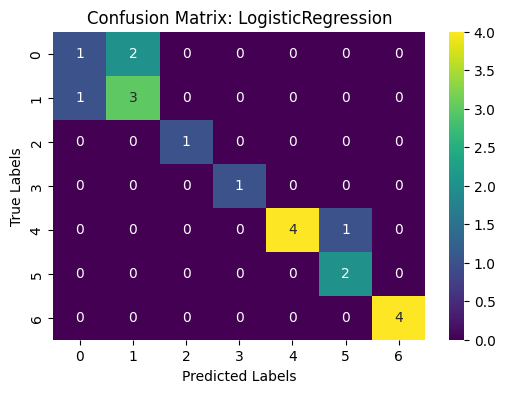


GaussianNB model:
Confusion Matrix:
[[3 0 0 0 0 0 0]
 [0 3 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]


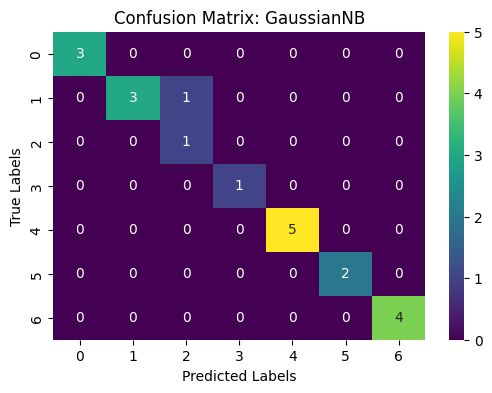


SVC model:
Confusion Matrix:
[[0 0 3 0 0 0 0]
 [0 2 0 0 0 2 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 1 1 0]
 [0 0 0 0 0 0 4]]


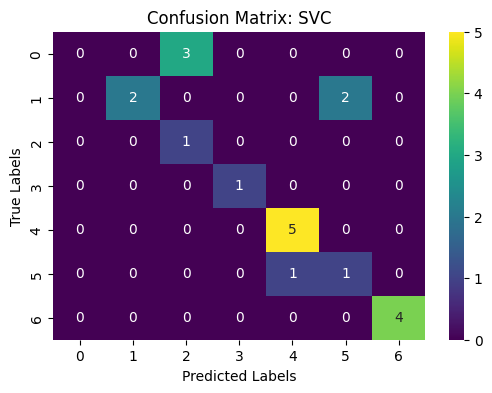


KNeighborsClassifier model:
Confusion Matrix:
[[2 1 0 0 0 0 0]
 [1 3 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 4 0 0]
 [0 0 0 0 1 1 0]
 [0 0 0 0 0 0 4]]


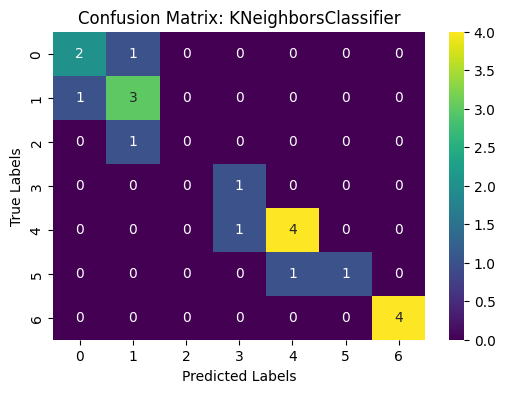


DecisionTreeClassifier model:
Confusion Matrix:
[[2 0 1 0 0 0 0]
 [0 3 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]


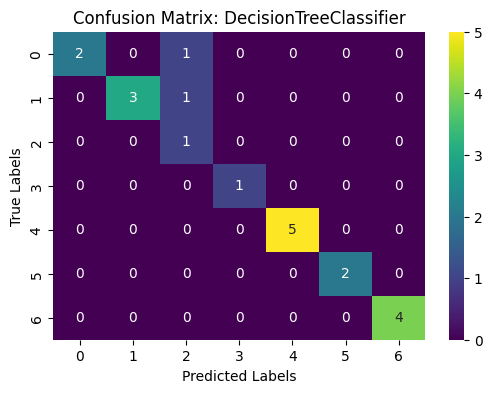


ExtraTreeClassifier model:
Confusion Matrix:
[[1 0 1 1 0 0 0]
 [0 2 0 0 1 1 0]
 [0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 3 1 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]


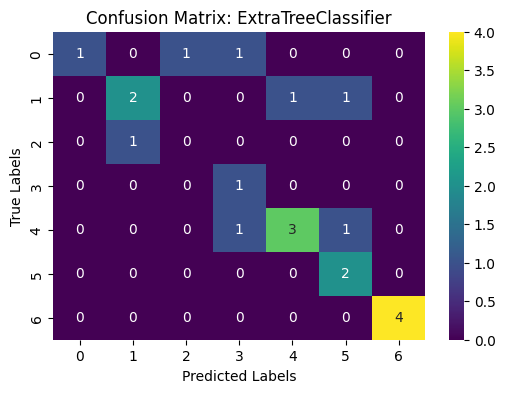


RandomForestClassifier model:
Confusion Matrix:
[[3 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]


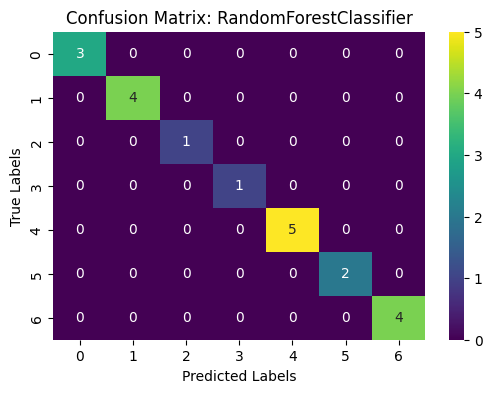


BaggingClassifier model:
Confusion Matrix:
[[2 0 1 0 0 0 0]
 [0 3 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]


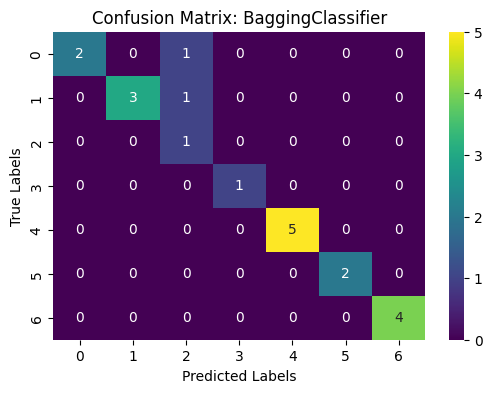


GradientBoostingClassifier model:
Confusion Matrix:
[[2 0 0 0 0 0 1]
 [0 3 0 0 0 0 1]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]


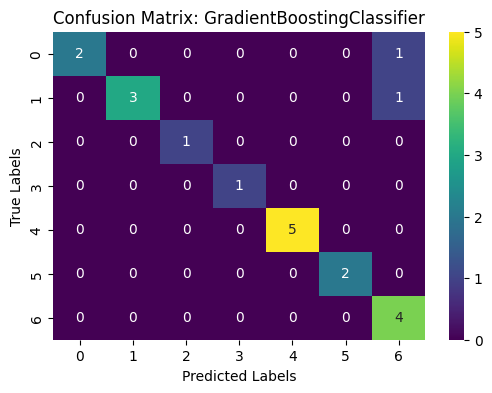


AdaBoostClassifier model:
Confusion Matrix:
[[0 0 0 3 0 0 0]
 [0 3 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]


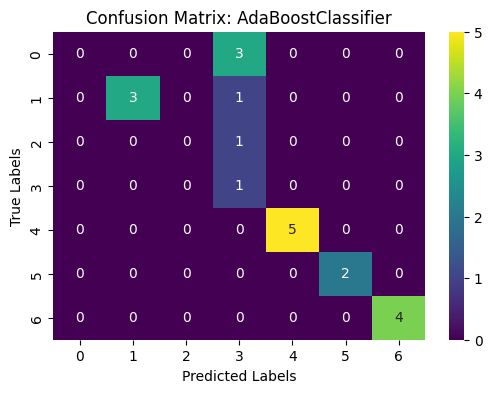


CatBoostClassifier model:
Confusion Matrix:
[[2 0 1 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]


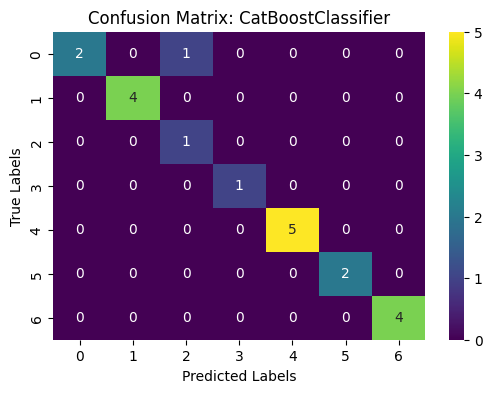

C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LGBMClassifier model:
Confusion Matrix:
[[3 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]


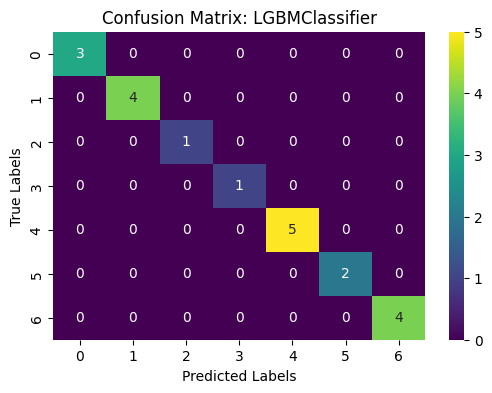

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the training and testing datasets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=True, yticklabels=True)  # Changed color theme to 'viridis'
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Iterate through the models, fit, predict, and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} model:")
    print(f"Confusion Matrix:\n{cm}")
    plot_confusion_matrix(cm, name)  # Visualize the confusion matrix


## Ensemble Types:

### 1) Voting Classifier (Soft Voting):

In [34]:
from sklearn.ensemble import VotingClassifier

# Create a list of all models
ensemble_models = [(name, model) for name, model in models.items()]

# Initialize the Voting Classifier
voting_ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')  # Use 'soft' for probabilities if supported

# Fit the ensemble model
voting_ensemble.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_ensemble = voting_ensemble.predict(X_test_scaled)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Voting Classifier Accuracy: {accuracy_ensemble:.4f}")

Ensemble Voting Classifier Accuracy: 1.0000


C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 2) Stacking Classifier:

In [35]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold

# Create a list of all models
ensemble_models = [(name, model) for name, model in models.items()]

# Meta-model
meta_model1 = RandomForestClassifier()

# Use StratifiedKFold to ensure balanced splits
stratified_kfold = StratifiedKFold(n_splits=3)

# Create Stacking Classifier with stratified cross-validation
stacking_ensemble = StackingClassifier(
    estimators=ensemble_models,
    final_estimator=meta_model1,
    cv=stratified_kfold  # Use stratified cross-validation
)

# Fit the ensemble model
stacking_ensemble.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_stack = stacking_ensemble.predict(X_test_scaled)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f"Ensemble Stacking Classifier Accuracy: {accuracy_stack:.4f}")

C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' wa

Ensemble Stacking Classifier Accuracy: 0.9500


C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 3) Weighted Voting (Customized Ensemble):

In [36]:
voting_ensemble_weighted = VotingClassifier(
    estimators=ensemble_models,
    voting='soft',  # Supports probabilities
    weights=[1, 1, 1, 1, 1, 1, 2, 2, 2, 0.5, 2, 2]  # Assign weights based on model performance
)

voting_ensemble_weighted.fit(X_train_scaled, y_train)

y_pred_weighted = voting_ensemble_weighted.predict(X_test_scaled)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Weighted Voting Ensemble Accuracy: {accuracy_weighted:.4f}")

Weighted Voting Ensemble Accuracy: 1.0000


C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### 4) Custom Blending (Manual Ensemble):

In [44]:
# Fit and predict for each base model
base_predictions = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Fit the model
    if hasattr(model, 'predict_proba'):  # Check if the model can predict probabilities
        prob = model.predict_proba(X_test)  # Get probabilities for blending
        base_predictions.append(prob)
    else:
        print(f"{name} does not support probability prediction.")
        
# Stack all the model probabilities as features for the blending classifier
stacked_predictions = np.hstack(base_predictions)

# Fit the meta-model (blending model)
meta_model1 = RandomForestClassifier()
meta_model1.fit(stacked_predictions, y_test)  # Use test labels for meta-model fitting

# Predict using the custom blended model
blended_pred = meta_model1.predict(stacked_predictions)

# Calculate accuracy
blended_accuracy = accuracy_score(y_test, blended_pred)

print(f"Custom Blended Ensemble Accuracy: {blended_accuracy:.4f}")

C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\oyjaa\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Custom Blended Ensemble Accuracy: 1.0000


Cross-validated Accuracy: 0.8500 ± 0.3571

Classification Report:
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         4
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Confusion Matrix:

[[3 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 5 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 4]]


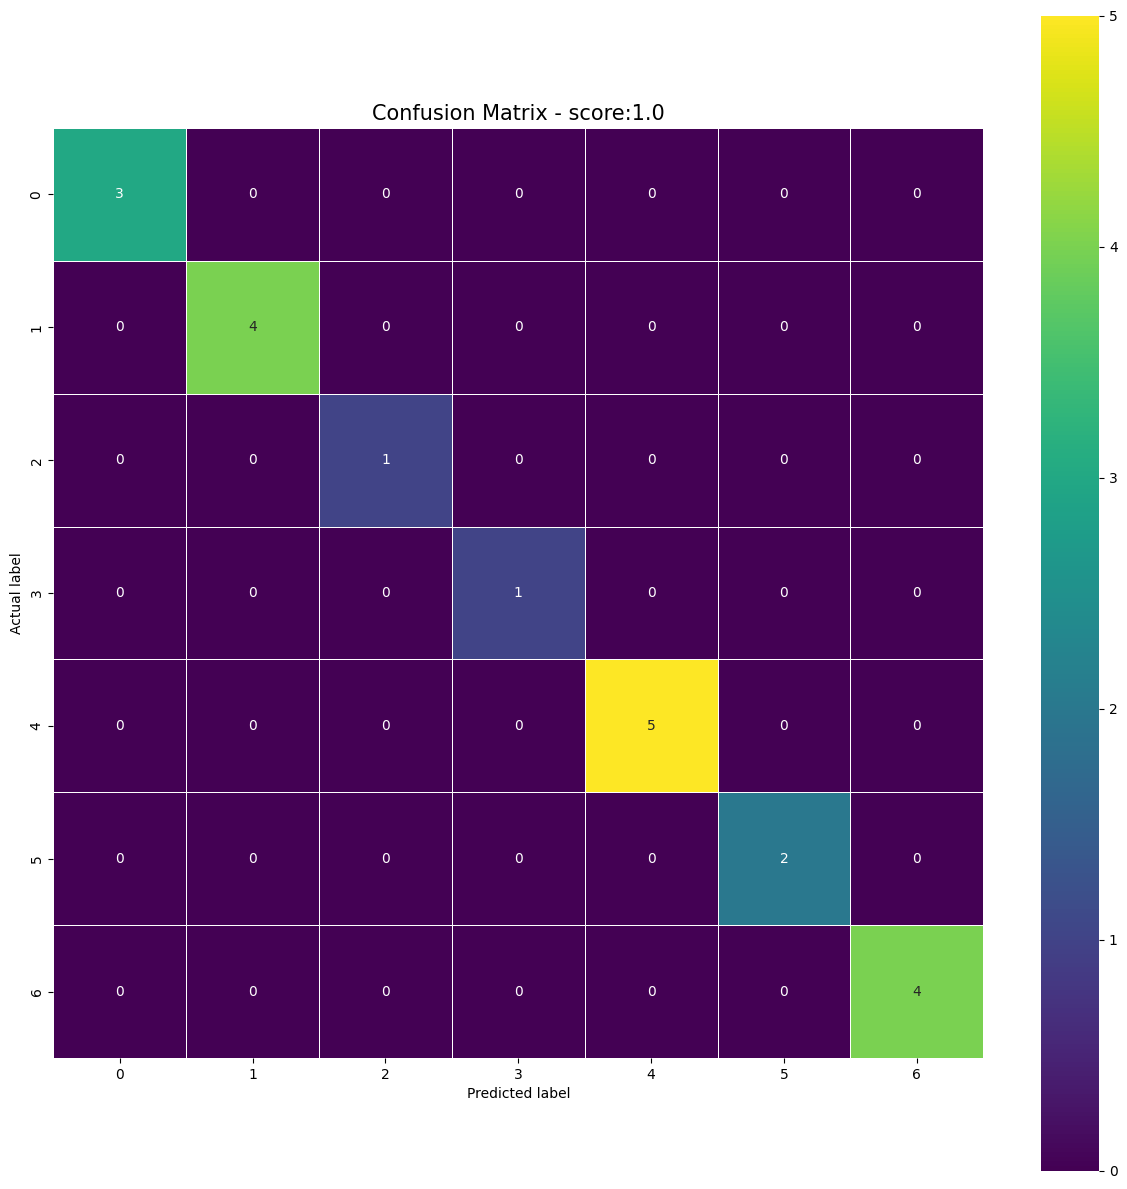

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Implement Leave-One-Out Cross-Validation (LOO-CV)
loo = LeaveOneOut()

# Cross-validation to estimate model performance using LOO-CV
cv_scores = cross_val_score(meta_model1, stacked_predictions, y_test, cv=loo)
print(f"Cross-validated Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Evaluate additional metrics like precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, blended_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, blended_pred)
print(confusion_matrix(y_test, blended_pred))

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='viridis')  # Changed color theme to 'viridis'
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix - score:' + str(accuracy_score(y_test, blended_pred))
plt.title(all_sample_title, size=15)
plt.show()

# ROC AUC Score (if it's a binary classification)
if len(np.unique(y_test)) == 2:
    roc_auc = roc_auc_score(y_test, meta_model1.predict_proba(stacked_predictions)[:, 1])
    print(f"\nROC AUC Score: {roc_auc:.4f}")


### Saving the model

In [47]:
import joblib

# Save the ensemble (meta-model and base models) together in one object
ensemble_model = {
    'base_models1': models,
    'meta_model1': meta_model1
}

joblib.dump(ensemble_model, "Fertilizer_Recommendation_model.pkl")

['Fertilizer_Recommendation_model.pkl']

In [48]:
['Fertilizer_Recommendation_model.pkl']

['Fertilizer_Recommendation_model.pkl']